In [1]:
from keras.datasets import reuters
import numpy as np

np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(train_data, train_labels), (test_data, test_labels)  = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decode_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
train_labels[10]

3

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimmension=10000):
  results = np.zeros((len(sequences),dimmension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels =  to_one_hot(test_labels)

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


W0821 19:04:08.100793 139974100715392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0821 19:04:08.130245 139974100715392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [13]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

W0821 19:10:02.282011 139974100715392 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0821 19:10:02.391445 139974100715392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 248us/step - loss: 2.5437 - acc: 0.5269 - val_loss: 1.7295 - val_acc: 0.6390
Epoch 2/20
7982/7982 [==============================] - 1s 134us/step - loss: 1.4210 - acc: 0.7112 - val_loss: 1.3146 - val_acc: 0.7200
Epoch 3/20
7982/7982 [==============================] - 1s 144us/step - loss: 1.0580 - acc: 0.7804 - val_loss: 1.1525 - val_acc: 0.7510
Epoch 4/20
7982/7982 [==============================] - 1s 169us/step - loss: 0.8337 - acc: 0.8239 - val_loss: 1.0564 - val_acc: 0.7660
Epoch 5/20
7982/7982 [==============================] - 1s 167us/step - loss: 0.6643 - acc: 0.8611 - val_loss: 0.9763 - val_acc: 0.7880
Epoch 6/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.5296 - acc: 0.8909 - val_loss: 0.9384 - val_acc: 0.7920
Epoch 7/20
7982/7982 [==============================] - 1s 170us/step - loss: 0.4266 - acc: 0.9093 - val_loss: 0.9337 - val_acc: 0.7970


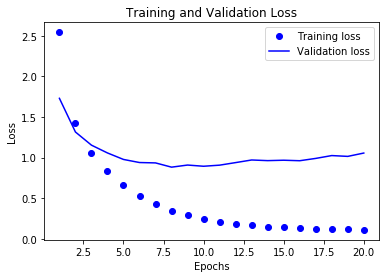

In [16]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

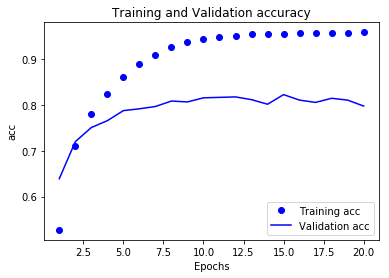

In [18]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()